# 方差过滤

In [47]:
#1.导入所需要的库
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time
import numpy as np
from sklearn.preprocessing import StandardScaler

In [48]:
# 2.导入数据集，探索数据
data = pd.read_csv(r"C:\Users\ASUS\Desktop\EEG\feature_analysis\ours\S6\16_s6.csv")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mean_0  1143 non-null   float64
 1   mean_1  1143 non-null   float64
 2   mean_2  1143 non-null   float64
 3   mean_3  1143 non-null   float64
 4   std_0   1143 non-null   float64
 5   std_1   1143 non-null   float64
 6   std_2   1143 non-null   float64
 7   std_3   1143 non-null   float64
 8   max_0   1143 non-null   float64
 9   max_1   1143 non-null   float64
 10  max_2   1143 non-null   float64
 11  max_3   1143 non-null   float64
 12  min_0   1143 non-null   float64
 13  min_1   1143 non-null   float64
 14  min_2   1143 non-null   float64
 15  min_3   1143 non-null   float64
 16  Label   1143 non-null   float64
dtypes: float64(17)
memory usage: 151.9 KB


In [49]:
data.shape

(1143, 17)

In [50]:
data.head()

mean_0  mean_1  mean_2   mean_3  std_0  std_1   std_2  std_3   max_0  \
0  14.800  7.3400 -0.4950  1.50000  334.0  282.0  107.00  162.0  1520.0   
1  -1.050  0.0325 -0.1630  0.00905   20.3   15.5   11.90   10.2    42.9   
2  -0.855  0.1730 -0.0269  0.15800  230.0  121.0   77.10  186.0   815.0   
3  -0.245 -0.0659  0.0123  0.06640   15.0   12.1    8.11   10.3    40.5   
4   0.412 -0.0998 -0.1910  0.00327   22.8   13.9   17.60    9.3    86.8   

    max_1  max_2  max_3   min_0   min_1  min_2  min_3  Label  
0  1180.0  503.0  830.0 -1390.0 -1170.0 -458.0 -740.0    2.0  
1    33.4   31.7   28.8   -50.8   -33.4  -29.8  -28.6    2.0  
2   424.0  250.0  637.0  -863.0  -411.0 -270.0 -682.0    2.0  
3    26.4   19.9   24.3   -32.1   -25.7  -19.9  -24.8    0.0  
4    33.8   43.1   25.6   -71.3   -38.6  -48.7  -24.6    0.0

In [51]:
data.describe()

mean_0       mean_1       mean_2       mean_3        std_0  \
count  1143.000000  1143.000000  1143.000000  1143.000000  1143.000000   
mean      0.002296    -0.002604     0.002725     0.000076    77.557662   
std       1.962996     1.216511     0.559418     0.178293    87.380644   
min     -14.600000   -12.800000    -4.860000    -1.750000     0.254000   
25%      -0.448000    -0.208000    -0.153000    -0.053100    17.950000   
50%       0.016200     0.006080     0.001050     0.003180    36.400000   
75%       0.461500     0.203000     0.150500     0.052100   116.500000   
max      14.800000     9.660000     3.010000     1.500000   521.000000   

             std_1        std_2        std_3        max_0        max_1  \
count  1143.000000  1143.000000  1143.000000  1143.000000  1143.000000   
mean     51.828912    39.256609    33.493214   218.060385   151.765526   
std      61.940558    41.067985    36.222647   260.042163   205.176422   
min       0.123000     0.122000     0.122000     1.060000     0.598000   
25%      14.850000    12.800000    12.000000    44.350000    39.000000   
50%      25.600000    24.200000    20.500000    89.700000    62.900000   
75%      65.750000    48.750000    39.900000   319.500000   189.500000   
max     424.000000   262.000000   308.000000  1810.000000  1880.000000   

             max_2        max_3        min_0        min_1        min_2  \
count  1143.000000  1143.000000  1143.000000  1143.000000  1143.000000   
mean    118.661589   104.630516  -216.145687  -152.265451  -119.103445   
std     136.387897   132.582678   258.889054   202.616146   136.079909   
min       0.348000     0.390000 -1770.000000 -1700.000000  -754.000000   
25%      34.900000    31.700000  -321.500000  -188.000000  -140.000000   
50%      63.400000    54.300000   -89.200000   -64.800000   -63.700000   
75%     138.000000   115.000000   -45.400000   -38.650000   -34.250000   
max     940.000000  1310.000000    -1.010000    -0.505000    -0.419000   

             min_3        Label  
count  1143.000000  1143.000000  
mean   -104.716418     0.902012  
std     132.407463     0.810950  
min   -1350.000000     0.000000  
25%    -115.500000     0.000000  
50%     -53.100000     1.000000  
75%     -32.000000     2.000000  
max      -0.483000     2.000000

In [52]:
from sklearn.preprocessing import LabelEncoder
y = data.iloc[:,-1]#要输入的是标签，不是特征矩阵，所以允许一维

In [53]:
le = LabelEncoder()  # 实例化
le = le.fit(y) # 导入数据
label = le.transform(y) # transform接口调取数据
le.classes_  #属性.classes_查看标签中究竟有多少类别
label

array([2, 2, 2, ..., 0, 0, 0], dtype=int64)

In [54]:
le.fit_transform(y)  #也可以直接fit_transform一步到位

array([2, 2, 2, ..., 0, 0, 0], dtype=int64)

In [55]:
le.inverse_transform(label)  #使用inverse_transform可以逆转

array([2., 2., 2., ..., 0., 0., 0.])

In [56]:
data.iloc[:,-1] = label  #让标签等于我们运行出来的结果
data.head()


mean_0  mean_1  mean_2   mean_3  std_0  std_1   std_2  std_3   max_0  \
0  14.800  7.3400 -0.4950  1.50000  334.0  282.0  107.00  162.0  1520.0   
1  -1.050  0.0325 -0.1630  0.00905   20.3   15.5   11.90   10.2    42.9   
2  -0.855  0.1730 -0.0269  0.15800  230.0  121.0   77.10  186.0   815.0   
3  -0.245 -0.0659  0.0123  0.06640   15.0   12.1    8.11   10.3    40.5   
4   0.412 -0.0998 -0.1910  0.00327   22.8   13.9   17.60    9.3    86.8   

    max_1  max_2  max_3   min_0   min_1  min_2  min_3  Label  
0  1180.0  503.0  830.0 -1390.0 -1170.0 -458.0 -740.0      2  
1    33.4   31.7   28.8   -50.8   -33.4  -29.8  -28.6      2  
2   424.0  250.0  637.0  -863.0  -411.0 -270.0 -682.0      2  
3    26.4   19.9   24.3   -32.1   -25.7  -19.9  -24.8      0  
4    33.8   43.1   25.6   -71.3   -38.6  -48.7  -24.6      0

In [57]:
print(data.columns)

Index(['mean_0', 'mean_1', 'mean_2', 'mean_3', 'std_0', 'std_1', 'std_2',
       'std_3', 'max_0', 'max_1', 'max_2', 'max_3', 'min_0', 'min_1', 'min_2',
       'min_3', 'Label'],
      dtype='object')


In [58]:
data['Label']

0       2
1       2
2       2
3       0
4       0
       ..
1138    0
1139    2
1140    0
1141    0
1142    0
Name: Label, Length: 1143, dtype: int64

In [59]:
data.shape

(1143, 17)

In [60]:
x = data.iloc[:,0:16]
x.head()

mean_0  mean_1  mean_2   mean_3  std_0  std_1   std_2  std_3   max_0  \
0  14.800  7.3400 -0.4950  1.50000  334.0  282.0  107.00  162.0  1520.0   
1  -1.050  0.0325 -0.1630  0.00905   20.3   15.5   11.90   10.2    42.9   
2  -0.855  0.1730 -0.0269  0.15800  230.0  121.0   77.10  186.0   815.0   
3  -0.245 -0.0659  0.0123  0.06640   15.0   12.1    8.11   10.3    40.5   
4   0.412 -0.0998 -0.1910  0.00327   22.8   13.9   17.60    9.3    86.8   

    max_1  max_2  max_3   min_0   min_1  min_2  min_3  
0  1180.0  503.0  830.0 -1390.0 -1170.0 -458.0 -740.0  
1    33.4   31.7   28.8   -50.8   -33.4  -29.8  -28.6  
2   424.0  250.0  637.0  -863.0  -411.0 -270.0 -682.0  
3    26.4   19.9   24.3   -32.1   -25.7  -19.9  -24.8  
4    33.8   43.1   25.6   -71.3   -38.6  -48.7  -24.6

In [61]:
x.describe()

mean_0       mean_1       mean_2       mean_3        std_0  \
count  1143.000000  1143.000000  1143.000000  1143.000000  1143.000000   
mean      0.002296    -0.002604     0.002725     0.000076    77.557662   
std       1.962996     1.216511     0.559418     0.178293    87.380644   
min     -14.600000   -12.800000    -4.860000    -1.750000     0.254000   
25%      -0.448000    -0.208000    -0.153000    -0.053100    17.950000   
50%       0.016200     0.006080     0.001050     0.003180    36.400000   
75%       0.461500     0.203000     0.150500     0.052100   116.500000   
max      14.800000     9.660000     3.010000     1.500000   521.000000   

             std_1        std_2        std_3        max_0        max_1  \
count  1143.000000  1143.000000  1143.000000  1143.000000  1143.000000   
mean     51.828912    39.256609    33.493214   218.060385   151.765526   
std      61.940558    41.067985    36.222647   260.042163   205.176422   
min       0.123000     0.122000     0.122000     1.060000     0.598000   
25%      14.850000    12.800000    12.000000    44.350000    39.000000   
50%      25.600000    24.200000    20.500000    89.700000    62.900000   
75%      65.750000    48.750000    39.900000   319.500000   189.500000   
max     424.000000   262.000000   308.000000  1810.000000  1880.000000   

             max_2        max_3        min_0        min_1        min_2  \
count  1143.000000  1143.000000  1143.000000  1143.000000  1143.000000   
mean    118.661589   104.630516  -216.145687  -152.265451  -119.103445   
std     136.387897   132.582678   258.889054   202.616146   136.079909   
min       0.348000     0.390000 -1770.000000 -1700.000000  -754.000000   
25%      34.900000    31.700000  -321.500000  -188.000000  -140.000000   
50%      63.400000    54.300000   -89.200000   -64.800000   -63.700000   
75%     138.000000   115.000000   -45.400000   -38.650000   -34.250000   
max     940.000000  1310.000000    -1.010000    -0.505000    -0.419000   

             min_3  
count  1143.000000  
mean   -104.716418  
std     132.407463  
min   -1350.000000  
25%    -115.500000  
50%     -53.100000  
75%     -32.000000  
max      -0.483000

In [62]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(x,y,test_size=0.2,random_state=10)
print(Xtrain.shape,Xtest.shape,Ytrain.shape,Ytest.shape)


(914, 16) (229, 16) (914,) (229,)


KNeighborsClassifier
****Results****
Accuracy: 79.4760%
Log Loss: 2.3294736529653535
SVC
****Results****
Accuracy: 74.2358%
Log Loss: 0.6618812798207102
NuSVC
****Results****
Accuracy: 79.4760%
Log Loss: 0.6161395569429726
RandomForestClassifier
****Results****
Accuracy: 93.8865%
Log Loss: 0.20471742170023702
ExtraTreesClassifier
****Results****
Accuracy: 96.5066%
Log Loss: 0.09078697093685138
LGBMClassifier
****Results****
Accuracy: 95.6332%
Log Loss: 0.15459004763813317
LinearDiscriminantAnalysis
****Results****
Accuracy: 58.9520%
Log Loss: 0.8817524179274603
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 68.9956%
Log Loss: 2.7060107120784993


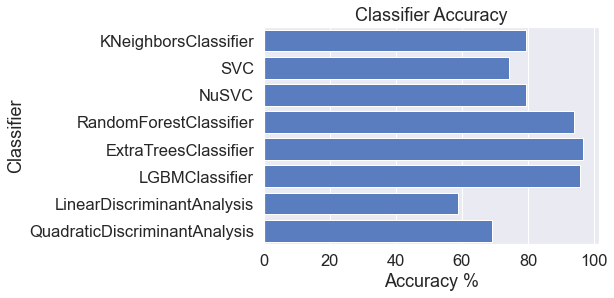

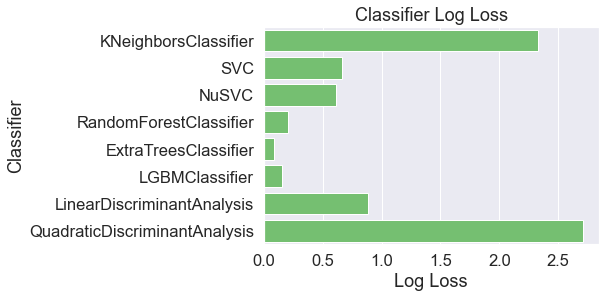

In [63]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier  # k近邻算法
from sklearn.svm import SVC, LinearSVC, NuSVC   #支持向量机分类器、线性支持向量机分类器、核支持向量分类
from sklearn.tree import DecisionTreeClassifier   # 决策树
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier   # 随机森林、极端随机森林、AdaBoost、GradientBoost
from sklearn.naive_bayes import GaussianNB    #朴素贝叶斯GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis   #线性判别分析
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis   #二次判别分析
import pandas as pd
import lightgbm 
from lightgbm import LGBMClassifier
import seaborn as sns

classifiers = [
    KNeighborsClassifier(2),
    SVC(kernel="rbf",probability=True),
    NuSVC(probability=True),
#     DecisionTreeClassifier(),
    RandomForestClassifier(),
    ExtraTreesClassifier(),
    LGBMClassifier(),
#     AdaBoostClassifier(),
#     GradientBoostingClassifier(),
#     GaussianNB(),
    LinearDiscriminantAnalysis(solver='svd'),
    QuadraticDiscriminantAnalysis()]

# 结果可视化
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(Xtrain, Ytrain)
    name = clf.__class__.__name__

    print("="*30)
    print(name)

    print('****Results****')
    train_predictions = clf.predict(Xtest)
    acc = accuracy_score(Ytest, train_predictions)
    print("Accuracy: {:.4%}".format(acc))

    train_predictions = clf.predict_proba(Xtest)
    ll = log_loss(Ytest, train_predictions)
    print("Log Loss: {}".format(ll))

    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)

print("="*30)
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

In [64]:
import os
from numpy import loadtxt
import xgboost as xgb
from numpy import sort
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn import datasets
from xgboost import plot_importance
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
import warnings
from matplotlib import  pyplot
import matplotlib.pyplot as plt
import matplotlib.pyplot as plot
warnings.filterwarnings("ignore")
# 加载数据集

CV accuracy scores:[0.93478261 0.95652174 0.91304348 0.91304348 0.92307692 0.92307692
 0.97802198 0.93406593 0.9010989  0.85714286]
Accuracy for XGBoost Classifier :  0.9233874820831343
[0.03233934 0.03875571 0.03094182 0.02240367 0.22058031 0.0412072
 0.07868164 0.16624175 0.0396401  0.05812259 0.03203129 0.04633432
 0.0839609  0.0314037  0.0436055  0.03375021]


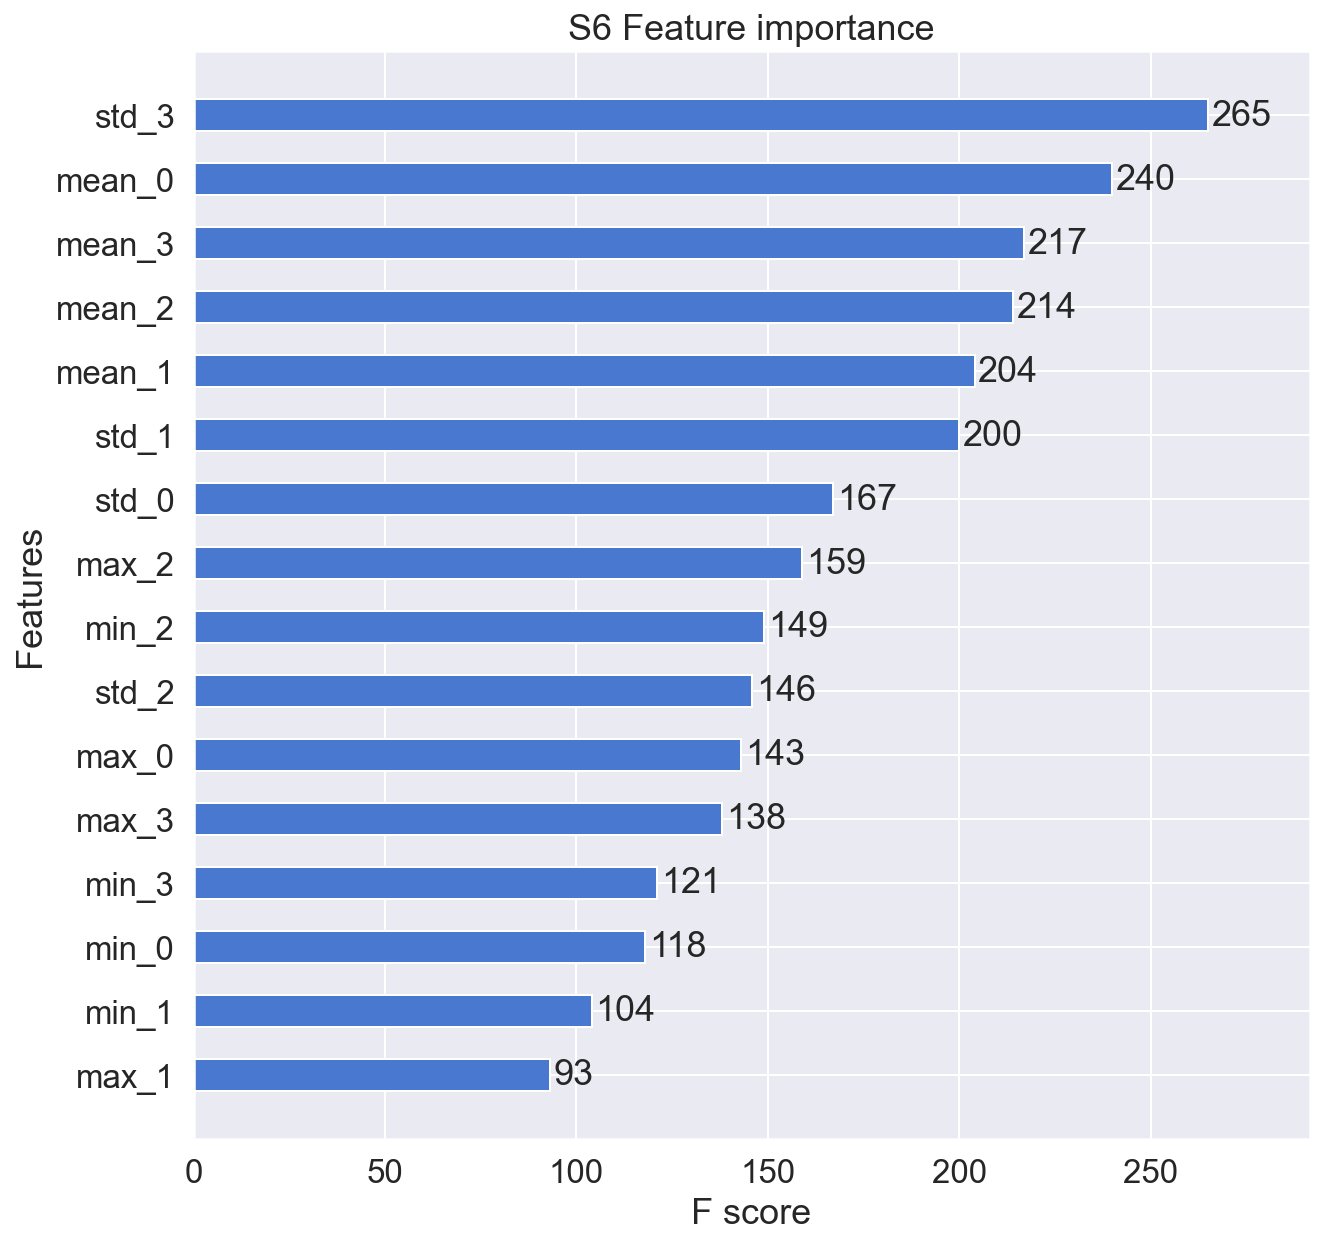

Accuracy: 94.76%
[0.02240367 0.03094182 0.0314037  0.03203129 0.03233934 0.03375021
 0.03875571 0.0396401  0.0412072  0.0436055  0.04633432 0.05812259
 0.07868164 0.0839609  0.16624175 0.22058031]
Thresh=0.022, n=16, Accuracy: 95.63%
Thresh=0.031, n=15, Accuracy: 95.63%
Thresh=0.031, n=14, Accuracy: 93.89%
Thresh=0.032, n=13, Accuracy: 94.76%
Thresh=0.032, n=12, Accuracy: 92.14%
Thresh=0.034, n=11, Accuracy: 93.01%
Thresh=0.039, n=10, Accuracy: 93.89%
Thresh=0.040, n=9, Accuracy: 91.27%
Thresh=0.041, n=8, Accuracy: 90.39%
Thresh=0.044, n=7, Accuracy: 92.14%
Thresh=0.046, n=6, Accuracy: 92.14%
Thresh=0.058, n=5, Accuracy: 92.14%
Thresh=0.079, n=4, Accuracy: 91.27%
Thresh=0.084, n=3, Accuracy: 93.01%
Thresh=0.166, n=2, Accuracy: 93.01%
Thresh=0.221, n=1, Accuracy: 77.73%
[0.9563318777292577, 0.9563318777292577, 0.9388646288209607, 0.9475982532751092, 0.9213973799126638, 0.9301310043668122, 0.9388646288209607, 0.9126637554585153, 0.9039301310043668, 0.9213973799126638, 0.9213973799126638,

In [65]:
          #数据预处理---scale标准化

model=XGBClassifier(objective='multi:softmax',
                                                       n_estimators=150,  # 迭代次数
                                                       learning_rate=0.2,  # 步长
                                                       max_depth=3,  # 树的最大深度
                                                       min_child_weight=1,  # 决定最小叶子节点样本权重和
                                                    
                                                      subsample=0.8,  # 每个决策树所用的子样本占总样本的比例（作用于样本）
                                                       colsample_bytree=0.8, 

                                                     )

#model = XGBClassifier()
model.fit(Xtrain, Ytrain)




scores = cross_val_score(model, Xtrain, Ytrain, cv=10)
print("CV accuracy scores:%s" % scores)
print('Accuracy for XGBoost Classifier : ', scores.mean())
# 变量重要性列表
print(model.feature_importances_)

# 变量重要性可视化

plt.figure(figsize=(6,4), dpi=144)
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)


# 变量重要性排序可视化

 
fig,ax = plt.subplots(figsize=(10,10) ,dpi=144)
plot_importance(model,
                height=0.5,
                ax=ax,
                 title='S6 Feature importance',
                max_num_features=64)
plt.savefig('./output/img_S6bar.svg')
plt.show()


# make predictions for test data and evaluate
y_pred = model.predict(Xtest)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(Ytest, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


#plot_importance(pl_xgb)
thresholds = sort(model.feature_importances_)
print(thresholds)


acc = []
for thresh in thresholds: # 遍历所有的特征重要性得分，把每个得分作为阈值进行特征选择
    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_Xtrain = selection.transform(Xtrain)
# train model
    selection_model = XGBClassifier()
    selection_model.fit(select_Xtrain, Ytrain)
# eval model
    select_Xtest = selection.transform(Xtest)
    y_pred = selection_model.predict(select_Xtest)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(Ytest, predictions)
    
   
    acc.append(accuracy)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_Xtrain.shape[1], accuracy*100.0))

print(acc)
    

In [66]:
from sklearn.manifold import TSNE
import time
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
RS = 123


time_start = time.time()

fashion_tsne = TSNE(random_state=RS, n_jobs=-1).fit_transform(Xtrain)

print(f't-SNE done! Time elapsed: {time.time()-time_start} seconds')



t-SNE done! Time elapsed: 2.2455317974090576 seconds


In [85]:
def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-100, 100)
    plt.ylim(-100, 100)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

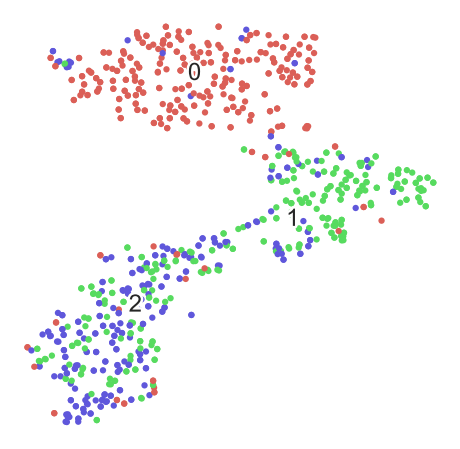

In [86]:
fashion_tsne = TSNE(random_state=RS, n_jobs=-1).fit_transform(Xtrain)

f, ax, sc, txts = fashion_scatter(fashion_tsne, Ytrain)
f.show()
f.savefig('./output/img_S6scatter16.svg')

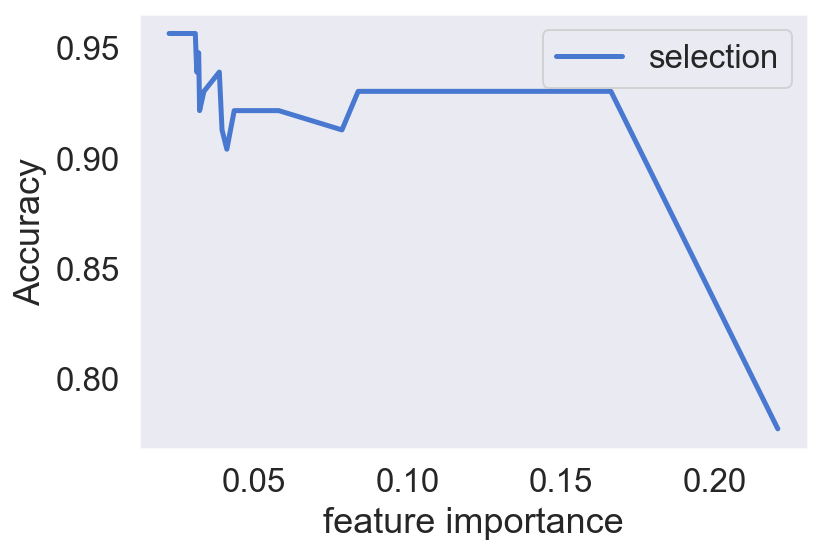

In [69]:
import matplotlib.pyplot as plt



plt.show()
plt.figure(figsize=(6,4), dpi=144)
plt.grid()
plt.xlabel("feature importance")
plt.ylabel("Accuracy")
plt.plot( thresholds,acc, label='selection')
plt.savefig('./output/img_S6cur.svg')
plt.legend()

In [70]:
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.metrics import recall_score,accuracy_score

from sklearn.metrics import precision_score,f1_score
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import auc
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from itertools import cycle

yy = label_binarize(label, classes=[0, 1, 2])
n_classes = yy.shape[1]
y_pred = model.predict(Xtest)
Y_pred = label_binarize(y_pred, classes=[0, 1, 2])


Y_test=label_binarize(Ytest, classes=[0, 1, 2])


# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i],
                                                       Y_pred[:, i])
    average_precision[i] = average_precision_score(Y_test[:, i], Y_pred[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test.ravel(),
    Y_pred.ravel())
average_precision["micro"] = average_precision_score(Y_test,Y_pred,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 0.92


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.92')

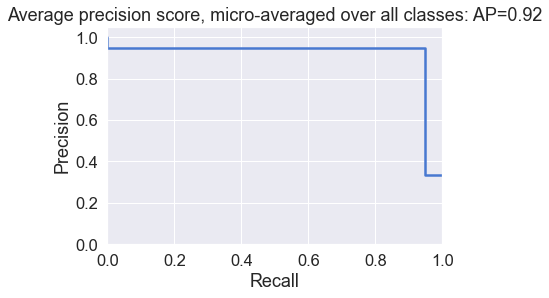

In [71]:
plt.figure()
plt.step(recall['micro'], precision['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))

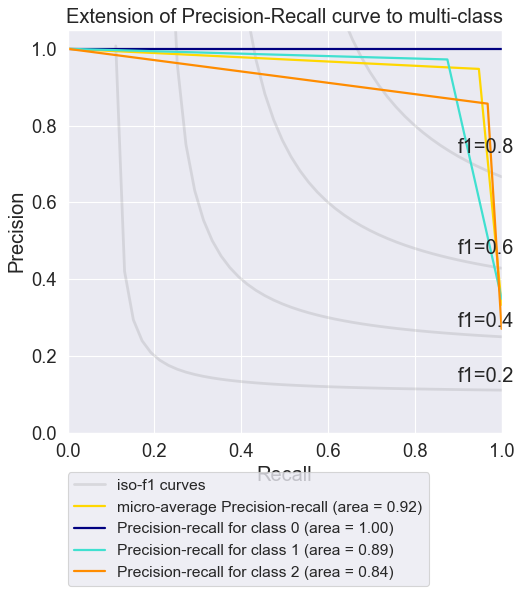

In [72]:
from itertools import cycle
# setup plot details
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

plt.figure(figsize=(7,8), dpi=80)
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')
l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=2)
lines.append(l)
labels.append('micro-average Precision-recall (area = {0:0.2f})'
              ''.format(average_precision["micro"]))

for i, color in zip(range(n_classes), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for class {0} (area = {1:0.2f})'
                  ''.format(i, average_precision[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(lines, labels, loc=(0, -.38), prop=dict(size=14))

plt.savefig('./output/img_S6pr.svg')
plt.show()

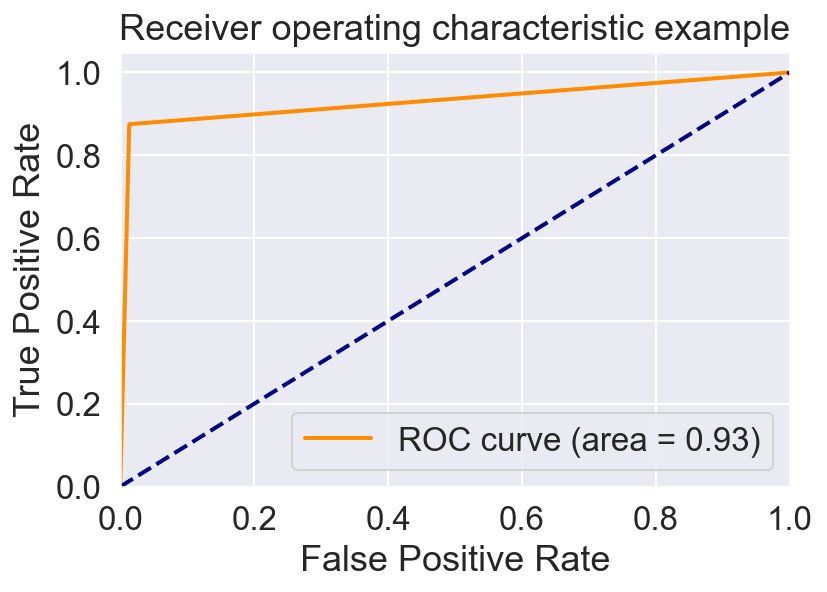

In [73]:




# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], Y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), Y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure(figsize=(6,4), dpi=144)
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


In [74]:
# Compute macro-average ROC curve and ROC area
yy = label_binarize(label, classes=[0, 1, 2])
classes = yy.shape[1]
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(6,4), dpi=144)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.savefig('./output/img_S6roc.svg')
plt.show()


In [75]:
print(Ytest)
a=np.count_nonzero(Ytest == 1)#Neg
b=np.count_nonzero(Ytest == 2)#Pos
c=np.count_nonzero(Ytest == 0)#Neu
print(a)
print(b)
print(c)

67      0.0
225     1.0
1121    1.0
74      1.0
43      2.0
       ... 
501     1.0
31      1.0
873     1.0
1083    0.0
518     1.0
Name: Label, Length: 229, dtype: float64
80
62
87


In [76]:
#多分类：混淆矩阵

from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(Ytest,y_pred)
cfm_normalized = cfm.astype('float') / cfm.sum(axis=1)[:, np.newaxis]
print(cfm_normalized)
print(cfm)

[[1.         0.         0.        ]
 [0.         0.875      0.125     ]
 [0.         0.03225806 0.96774194]]
[[87  0  0]
 [ 0 70 10]
 [ 0  2 60]]


In [77]:
import seaborn as sns

labels=["Neu","Neg","Pos"]
plt.figure(figsize=(6,4), dpi=144)
plt.xlabel("S6")
sns.heatmap(cfm_normalized,annot=True,cmap='Blues',xticklabels=labels,yticklabels= labels,annot_kws={"fontsize":18},fmt='.2f')
plt.savefig('./output/img_S6.svg')

array([[-2.6580039e-01,  1.7424482e-01, -2.5058511e-01, -3.9513445e-01,
        -7.3687035e-01, -5.9041750e-01, -2.5872121e-02, -9.3068272e-01,
         7.6715000e-02, -1.7704241e-01, -4.8627654e-01, -1.3675805e-02,
        -6.6815495e-02,  1.2423265e-01, -3.2535851e-01, -2.1709678e-01],
       [-2.8431273e-01,  1.0890917e-01, -2.0832689e-01, -6.7571644e-05,
        -9.1412455e-01, -4.9341610e-01,  1.5372460e-01, -1.0403059e+00,
         1.0461493e-01, -1.7883945e-01, -5.3009748e-01,  1.8457443e-02,
        -9.5456079e-02,  9.3952388e-02, -1.7111008e-01, -2.7897304e-01]],
      dtype=float32)

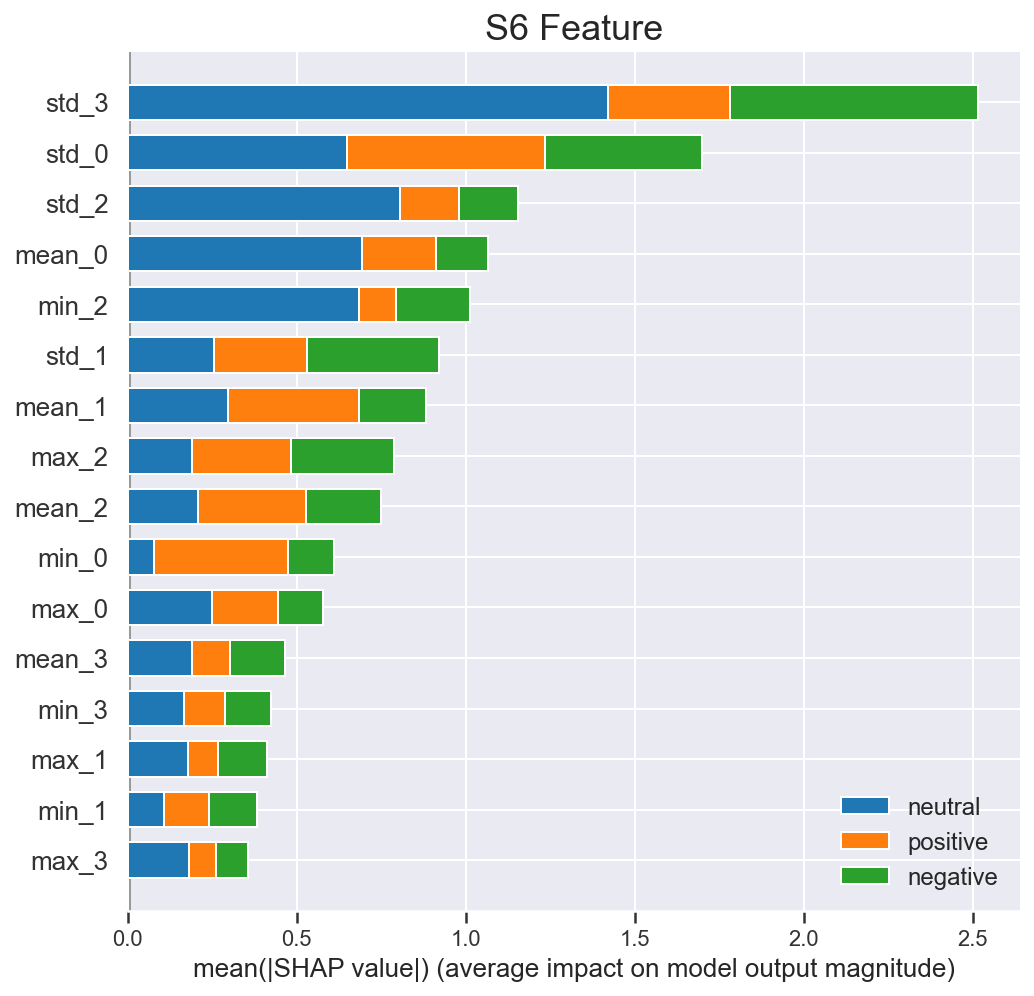

In [78]:
import shap
import matplotlib.pyplot as pl

class_names = ['neutral', 'negative', 'positive']
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(Xtrain)

plt.figure(figsize=(6,4), dpi=144)
plt.title('S6 Feature')
shap.summary_plot(shap_values,Xtrain,color=pl.get_cmap("tab10"),plot_type="bar",class_names= class_names,feature_names = Xtrain.columns,show=False)
plt.savefig('./output/img_S6shap.svg')
shap_values[1][:2,:]#表示前两个样本对于输出标签为1的shap值


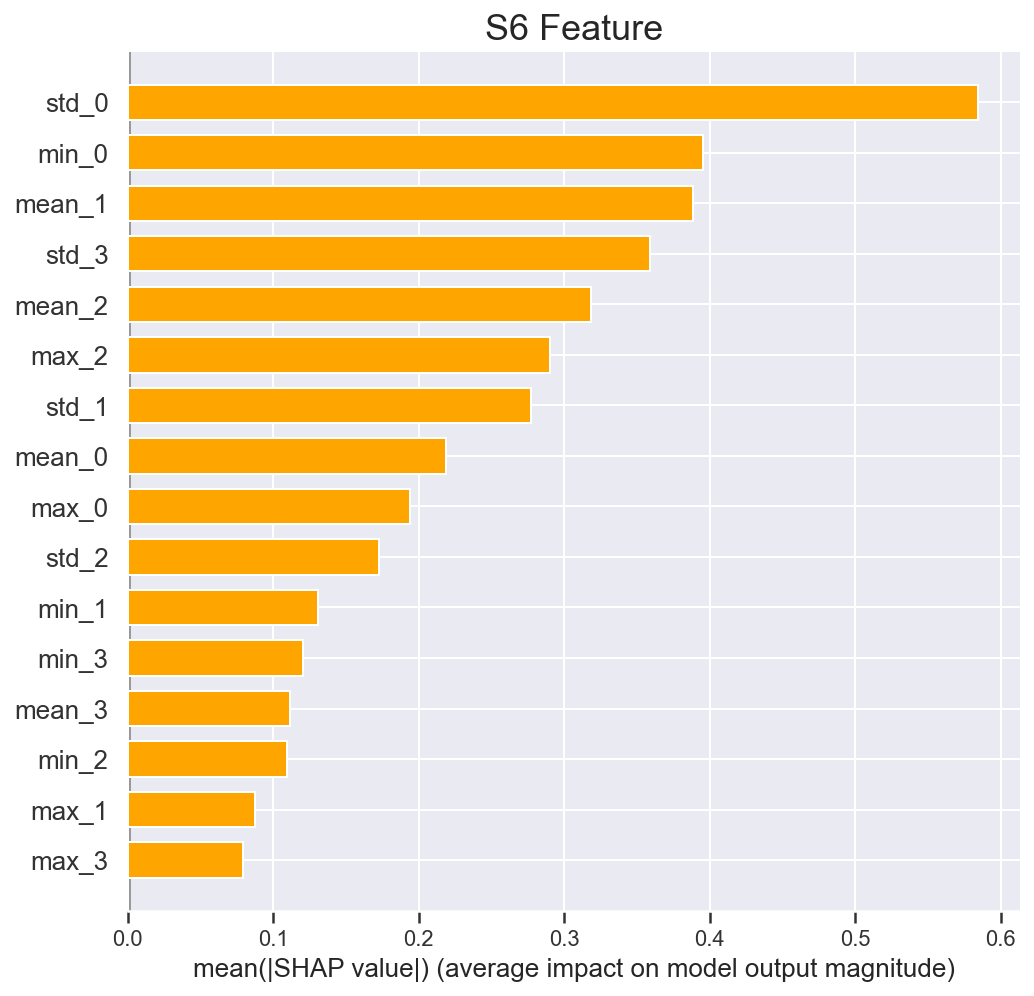

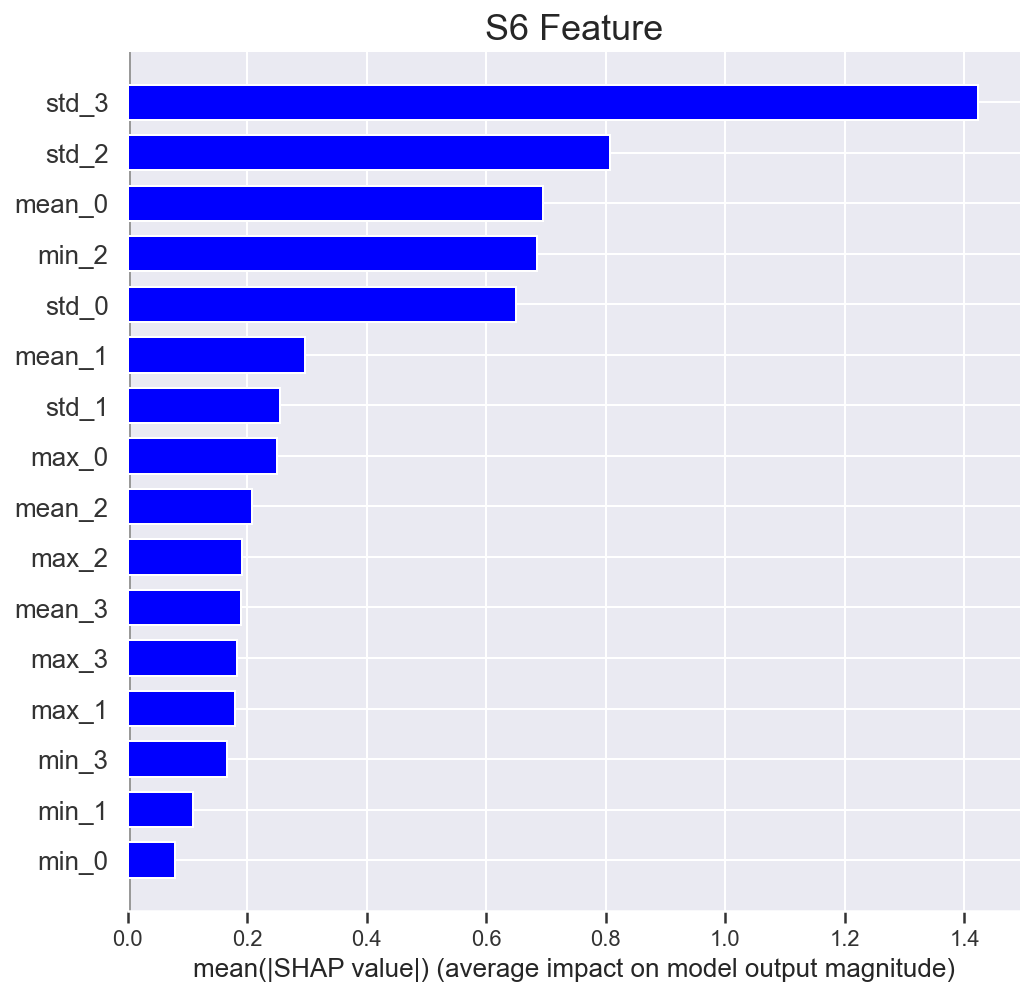

In [79]:
plt.figure(figsize=(6,4), dpi=144)
plt.title('S6 Feature')
shap.summary_plot(shap_values[1],Xtest, plot_type="bar",color='green',show=False)
plt.savefig('./output/img_S6green.svg')

plt.figure(figsize=(6,4), dpi=144)
plt.title('S6 Feature')
shap.summary_plot(shap_values[2],Xtest, plot_type="bar",color='orange',show=False)
plt.savefig('./output/img_S6orange.svg')

plt.figure(figsize=(6,4), dpi=144)
plt.title('S6 Feature')
shap.summary_plot(shap_values[0],Xtest, plot_type="bar",color='blue',show=False)
plt.savefig('./output/img_S6blue.svg')

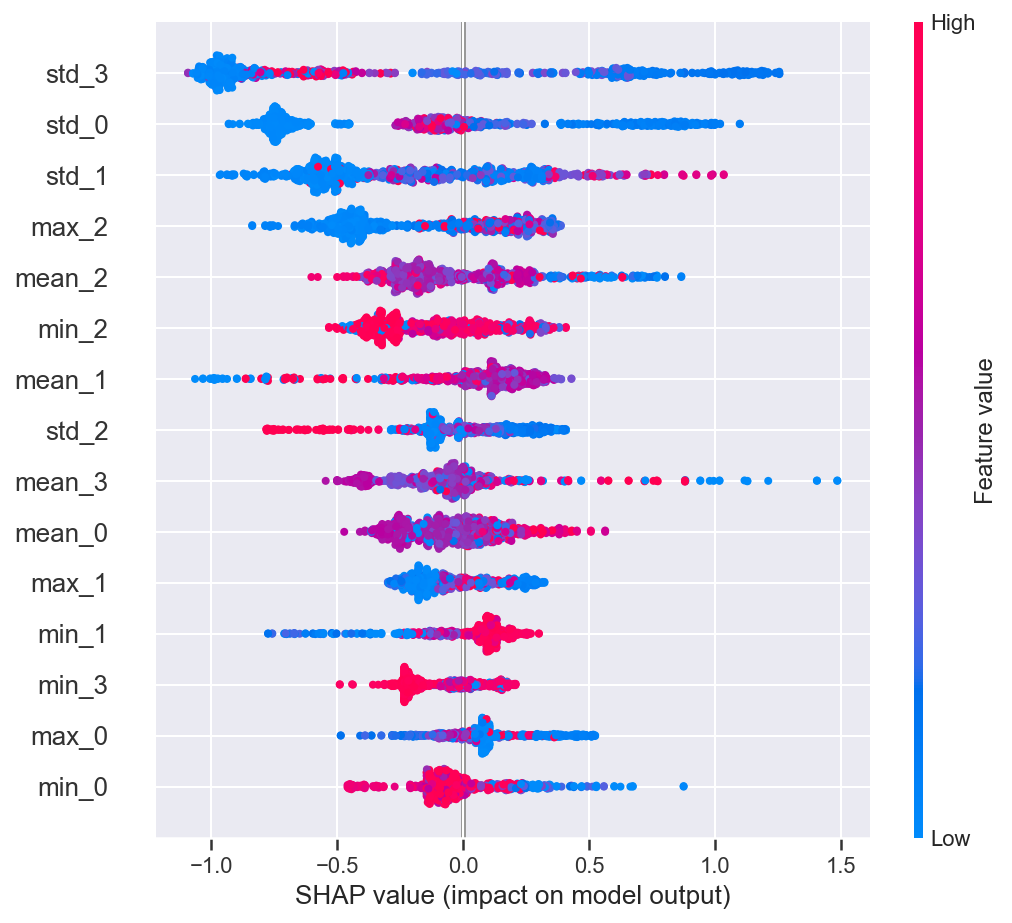

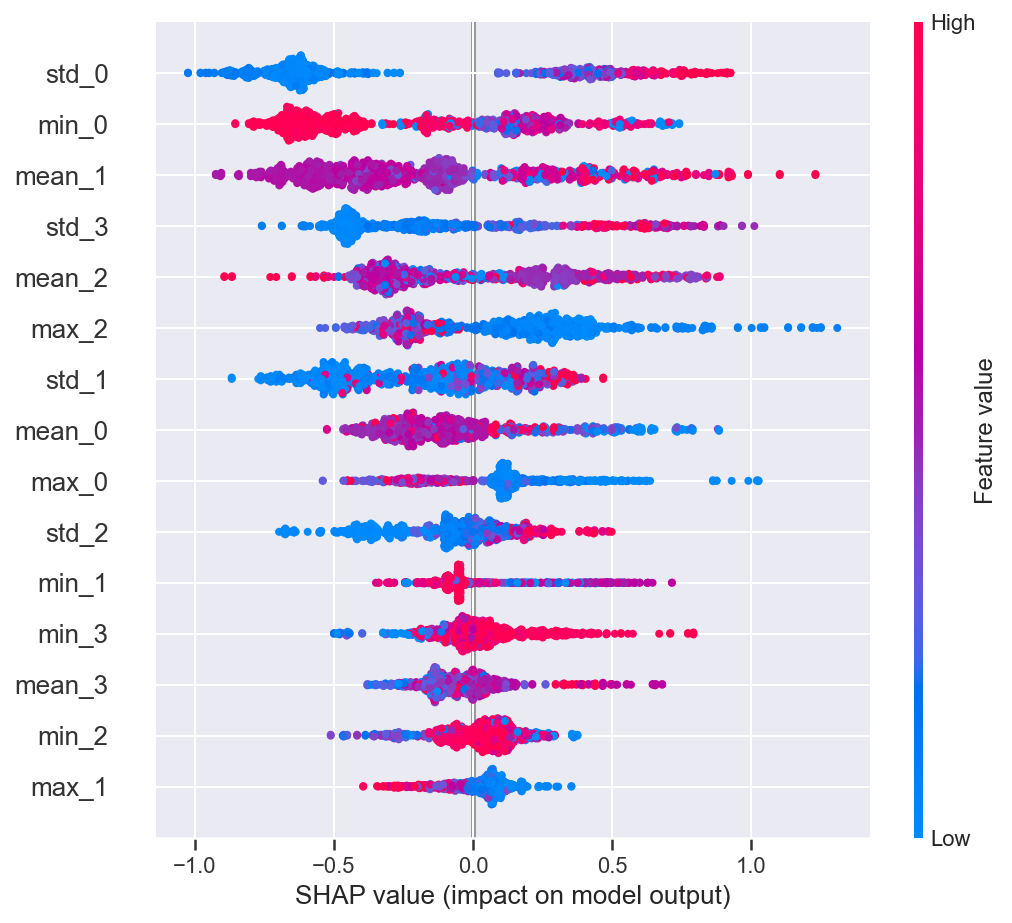

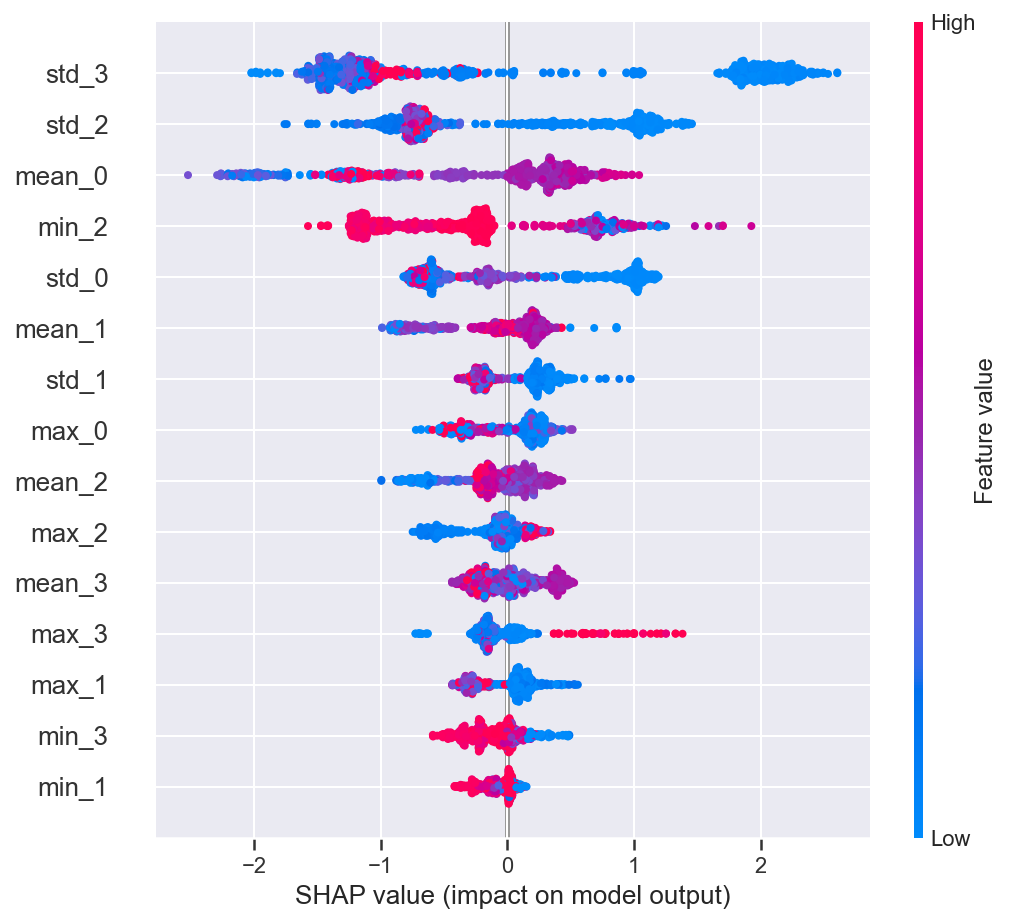

In [80]:
# SHAP值解释
plt.figure(figsize=(6,4), dpi=144)
shap.summary_plot(shap_values[1], Xtrain, max_display=15,show=False)#消极情感
plt.savefig('./output/img_S6neg.svg')
plt.figure(figsize=(6,4), dpi=144)
shap.summary_plot(shap_values[2], Xtrain, max_display=15,show=False)#积极情感
plt.savefig('./output/img_S6pos.svg')
plt.figure(figsize=(6,4), dpi=144)
shap.summary_plot(shap_values[0], Xtrain, max_display=15,show=False)#中性情感
plt.savefig('./output/img_S6neu.svg')

In [81]:
shap.initjs()
plt.figure(figsize=(6,4), dpi=144)
shap.force_plot(explainer.expected_value[1], shap_values[1][1,:], Xtrain.iloc[1,:],matplotlib=True,show=False)
plt.savefig('./output/img_S6force.svg',bbox_inches="tight")

<Figure size 864x576 with 0 Axes>

In [82]:
shap.force_plot(explainer.expected_value[2], shap_values[2][1,:], Xtrain.iloc[1,:],matplotlib=True,show=False)

In [83]:
plt.figure(figsize=(6,4), dpi=144)
shap.force_plot(explainer.expected_value[0], shap_values[0][1,:], Xtrain.iloc[1,:],matplotlib=True,show=False)
plt.savefig('./output/img_S6force2.svg')

<Figure size 864x576 with 0 Axes>

In [84]:
# 单个特征'dangou_ratio'与模型预测结果的关系
shap.dependence_plot('std_3', shap_values[1],Xtrain[x.columns], display_features=Xtrain[x.columns],interaction_index=None)
shap.dependence_plot('std_0', shap_values[1],Xtrain[x.columns], display_features=Xtrain[x.columns],interaction_index='auto')

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

# ---------------------------分割线-----------------------------

# Embedded嵌入法

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as RFC

In [ ]:
RFC_ = RFC(n_estimators=10,random_state=0)  # 随机森林实例化

In [ ]:
x = data_.iloc[:,:-2]
y = data_.iloc[:,-1]
x.shape

* 阈值为0.005

In [ ]:
x_embedded = SelectFromModel(RFC_,threshold=0.005).fit_transform(x,y)
#在这里我只想取出来有限的特征。0.005这个阈值对于有780个特征的数据来说，是非常高的阈值，因为平均每个特征
# 只能够分到大约0.001的feature_importances_

In [ ]:
x_embedded.shape
#模型的维度明显被降低了
#同样的，我们也可以画学习曲线来找最佳阈值

In [ ]:
RFC_.fit(x,y).feature_importances_

In [ ]:
(RFC_.fit(x,y).feature_importances_).max()

In [ ]:
# 绘制学习曲线
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
RFC_.fit(x,y).feature_importances_
threshold = np.linspace(0,(RFC_.fit(x,y).feature_importances_).max(),20)
#0 - feature_importances_ 范围中取20个数

score = []
for i in threshold:
    x_embedded = SelectFromModel(RFC_,threshold=i).fit_transform(x,y) # 随机森林实例化
    once = cross_val_score(RFC_,x_embedded,y,cv=5).mean()  # 交叉验证5次
    score.append(once)
plt.plot(threshold,score)
plt.show()

In [ ]:
threshold

In [ ]:
x_embedded = SelectFromModel(RFC_,threshold=0.00870999).fit_transform(x,y)

In [ ]:
x_embedded.shape

In [ ]:
cross_val_score(RFC_,x_embedded,y,cv=5).mean()

In [ ]:
# 确定准确率最高threshold值


score2 = []
for i in np.linspace(0,0.00870999,20):
    x_embedded = SelectFromModel(RFC_,threshold=i).fit_transform(x,y)
    once = cross_val_score(RFC_,x_embedded,y,cv=5).mean()
    score2.append(once)
plt.figure(figsize=[20,5])
plt.plot(np.linspace(0,0.00870999,20),score2)
plt.xticks(np.linspace(0,0.00870999,20))
plt.show()

In [ ]:
x_embedded = SelectFromModel(RFC_,threshold=0.003209).fit_transform(x,y)

In [ ]:
x_embedded.shape

In [ ]:
cross_val_score(RFC_,x_embedded,y,cv=5).mean()

In [ ]:
cross_val_score(RFC(n_estimators=100,random_state=0),x_embedded,y,cv=5).mean()

* 阈值为0.001

In [ ]:
x_embedded = SelectFromModel(RFC_,threshold=0.001).fit_transform(x,y)
#在这里我只想取出来有限的特征。0.005这个阈值对于有780个特征的数据来说，是非常高的阈值，因为平均每个特征
# 只能够分到大约0.001的feature_importances_

In [ ]:
x_embedded.shape

In [ ]:
RFC_.fit(x,y).feature_importances_

In [ ]:
(RFC_.fit(x,y).feature_importances_).max()

In [ ]:
# 绘制学习曲线
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
RFC_.fit(x,y).feature_importances_
threshold = np.linspace(0,(RFC_.fit(x,y).feature_importances_).max(),20)
#0 - feature_importances_ 范围中取20个数

score = []
for i in threshold:
    x_embedded = SelectFromModel(RFC_,threshold=i).fit_transform(x,y) # 随机森林实例化
    once = cross_val_score(RFC_,x_embedded,y,cv=5).mean()  # 交叉验证5次
    score.append(once)
plt.plot(threshold,score)
plt.show()

In [ ]:
threshold

# Wrapper包装法

In [ ]:
from sklearn.feature_selection import RFE
RFC_ = RFC(n_estimators=10,random_state=0)
selector = RFE(RFC_,n_features_to_select=22,step=5).fit(x,y)  # 每迭代一次删除掉50个特征

In [ ]:
selector.support_.sum() #.support_：返回所有的特征的是否最后被选中的布尔矩阵

In [ ]:
selector.ranking_   #返回特征的按数次迭代中综合重要性的排名,越重要的特征排在前面

In [ ]:
x_wrapper = selector.transform(x)

In [ ]:
cross_val_score(RFC_,x_wrapper,y,cv=5).mean()

In [ ]:
# 绘制学习曲线
score = []
for i in range(1,751,50):
    x_wrapper = RFE(RFC_,n_features_to_select=i, step=50).fit_transform(x,y)
    once = cross_val_score(RFC_,x_wrapper,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(1,751,50),score)
plt.xticks(range(1,751,50))
plt.show()